# Diabetes_Prediction_system

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [389]:
filepath = r'C:\Users\anudi\Downloads\PersonalProjects\Datasets\diabetes_dataset.csv'
df = pd.read_csv(filepath)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [390]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [392]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [393]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [394]:
df.shape

(2000, 9)

In [395]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [396]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
96,2,92,62,28,0,31.6,0.130,24,0
1700,7,168,88,42,321,38.2,0.787,40,1
633,1,128,82,17,183,27.5,0.115,22,0
1141,5,136,82,0,0,0.0,0.640,69,0
30,9,91,68,0,0,24.2,0.200,58,0


In [397]:
# Count of duplicate rows
df.duplicated().sum()

np.int64(1256)

In [398]:
# Display duplicates rows
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,0,84,82,31,125,38.2,0.233,23,0
484,0,145,0,0,0,44.2,0.630,31,1
485,0,135,68,42,250,42.3,0.365,24,1
486,1,139,62,41,480,40.7,0.536,21,0
487,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [399]:
# Removing duplicates
df_clean = df.drop_duplicates(keep='first')
df_clean.shape

(744, 9)

In [400]:
# selecting numerical columns
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [401]:
# Correlation metrics
corr_df = df_clean.corr()

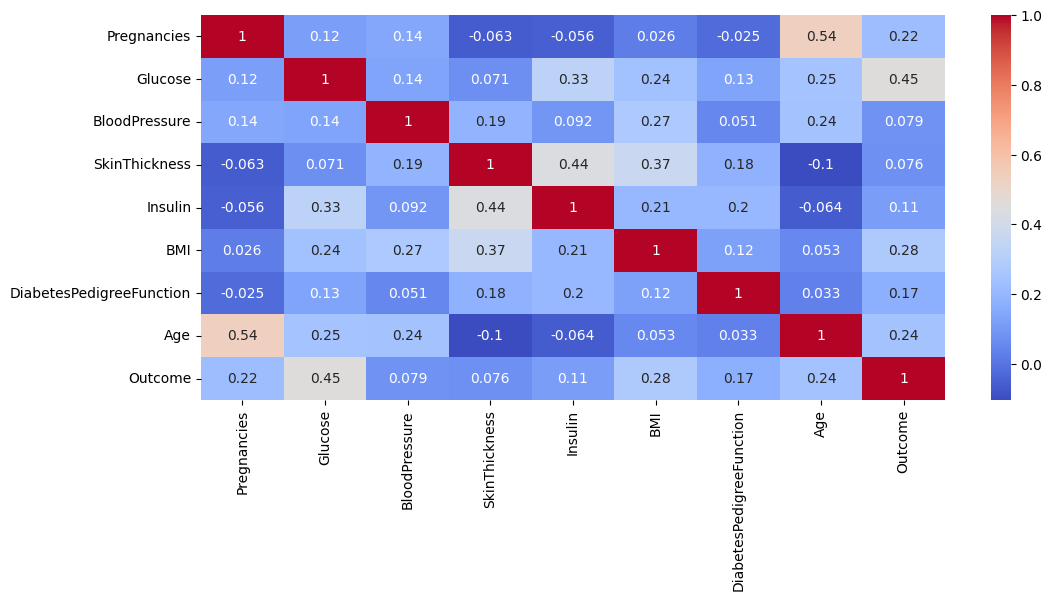

In [402]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

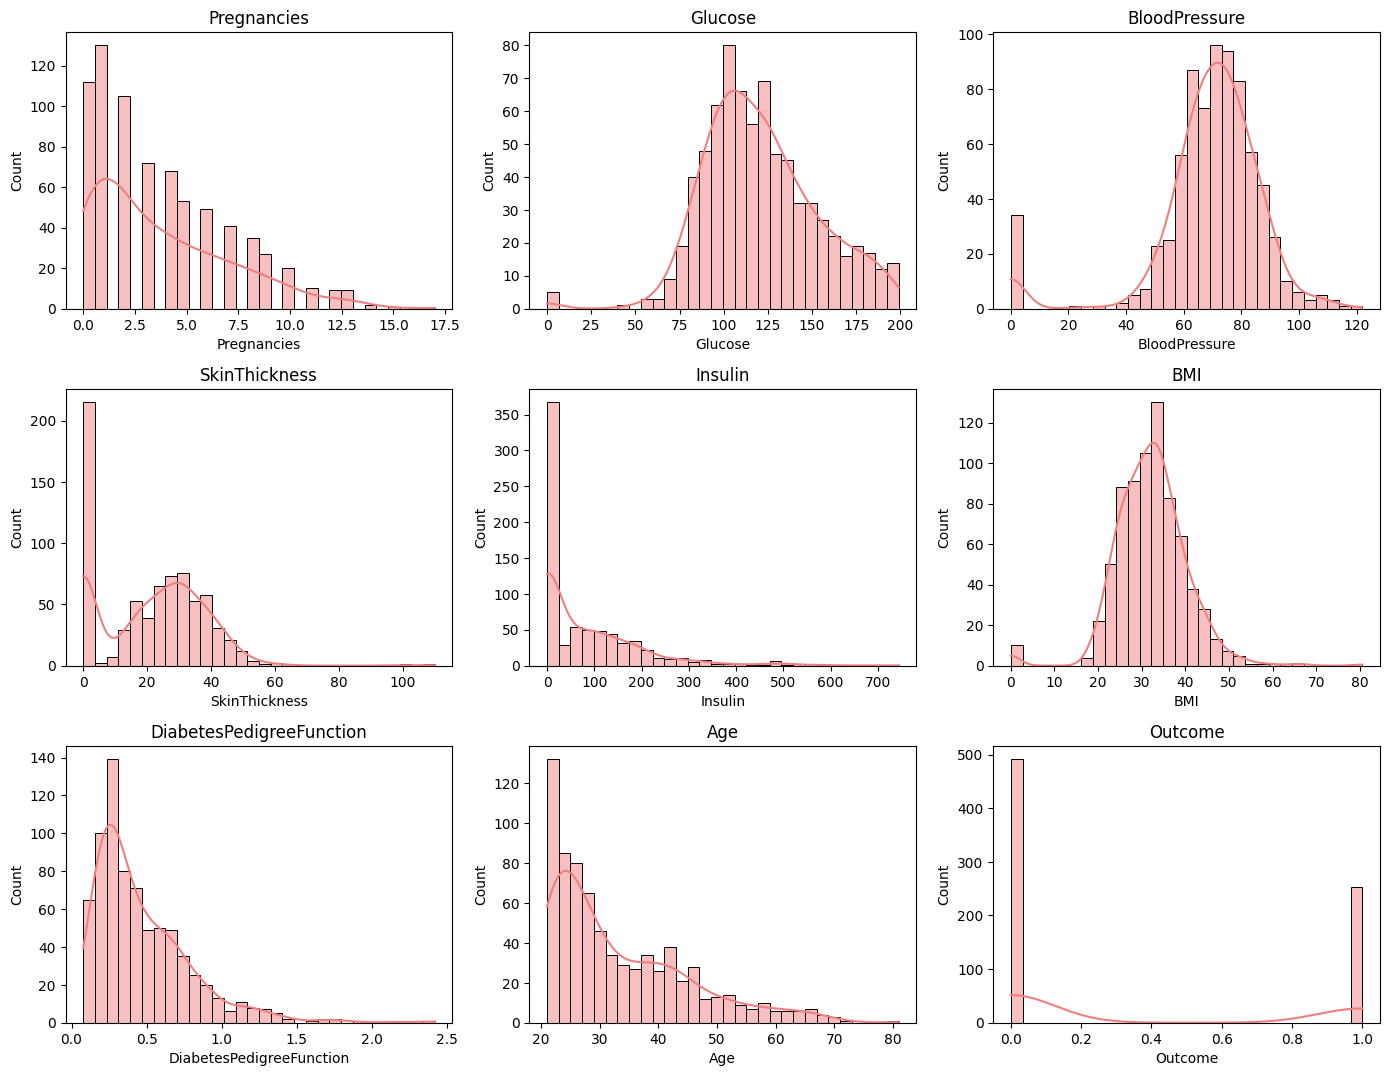

In [403]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_clean[col], bins=30, kde=True, color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()

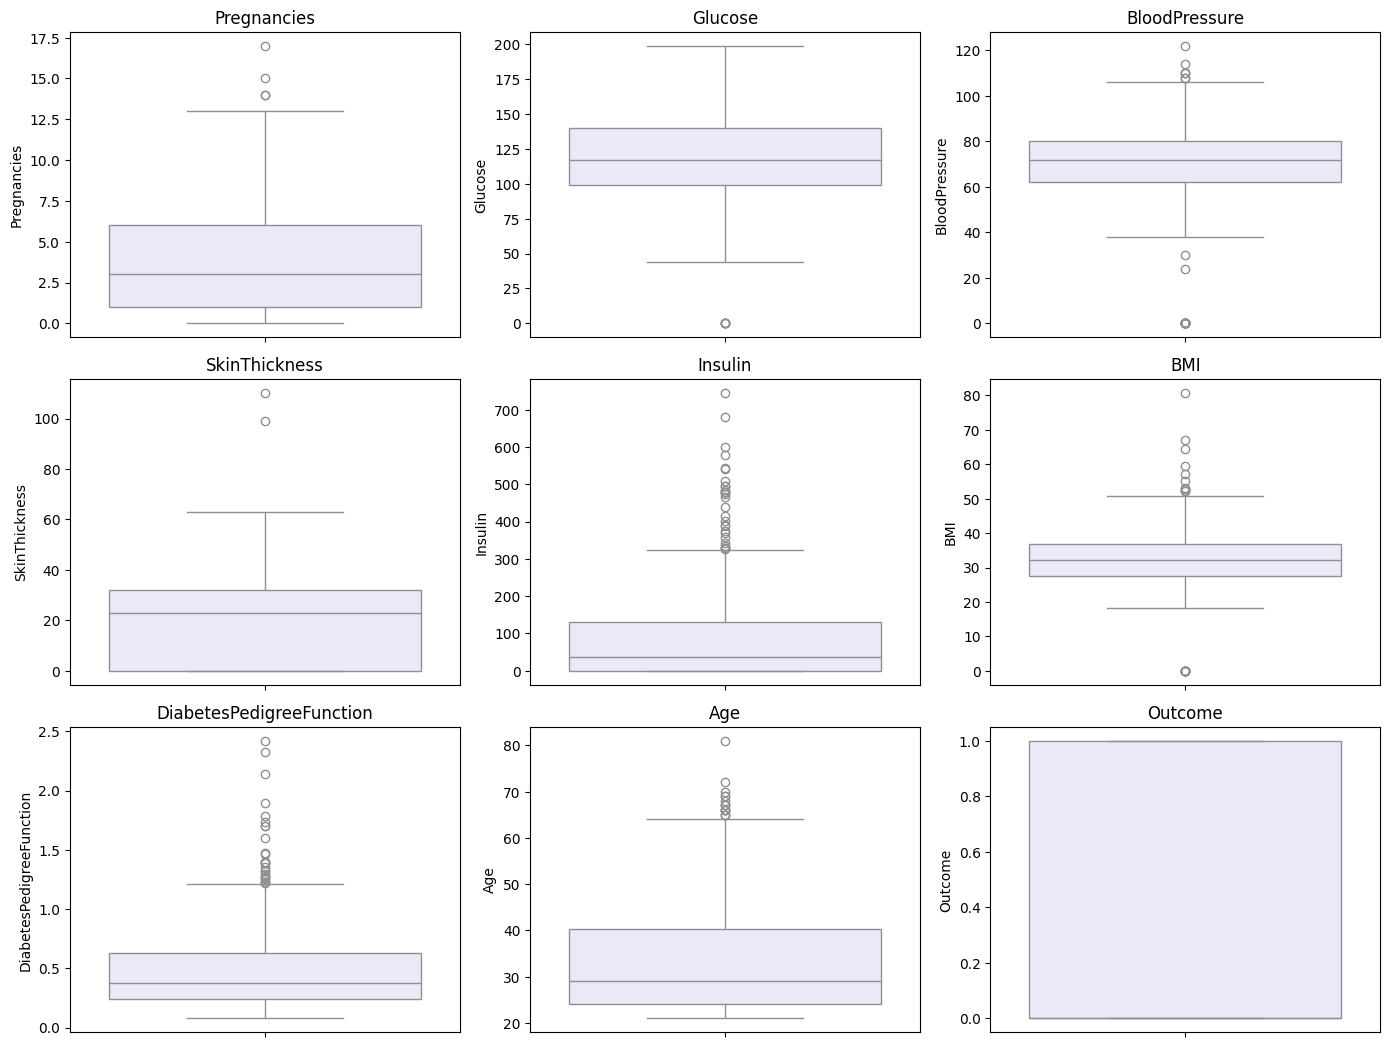

In [404]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_clean[col], color='lavender')
    plt.title(col)
plt.tight_layout()
plt.show()

In [405]:
for col in num_cols:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df_clean[col] = df_clean[col].clip(lower = lower_bound, upper = upper_bound)
    

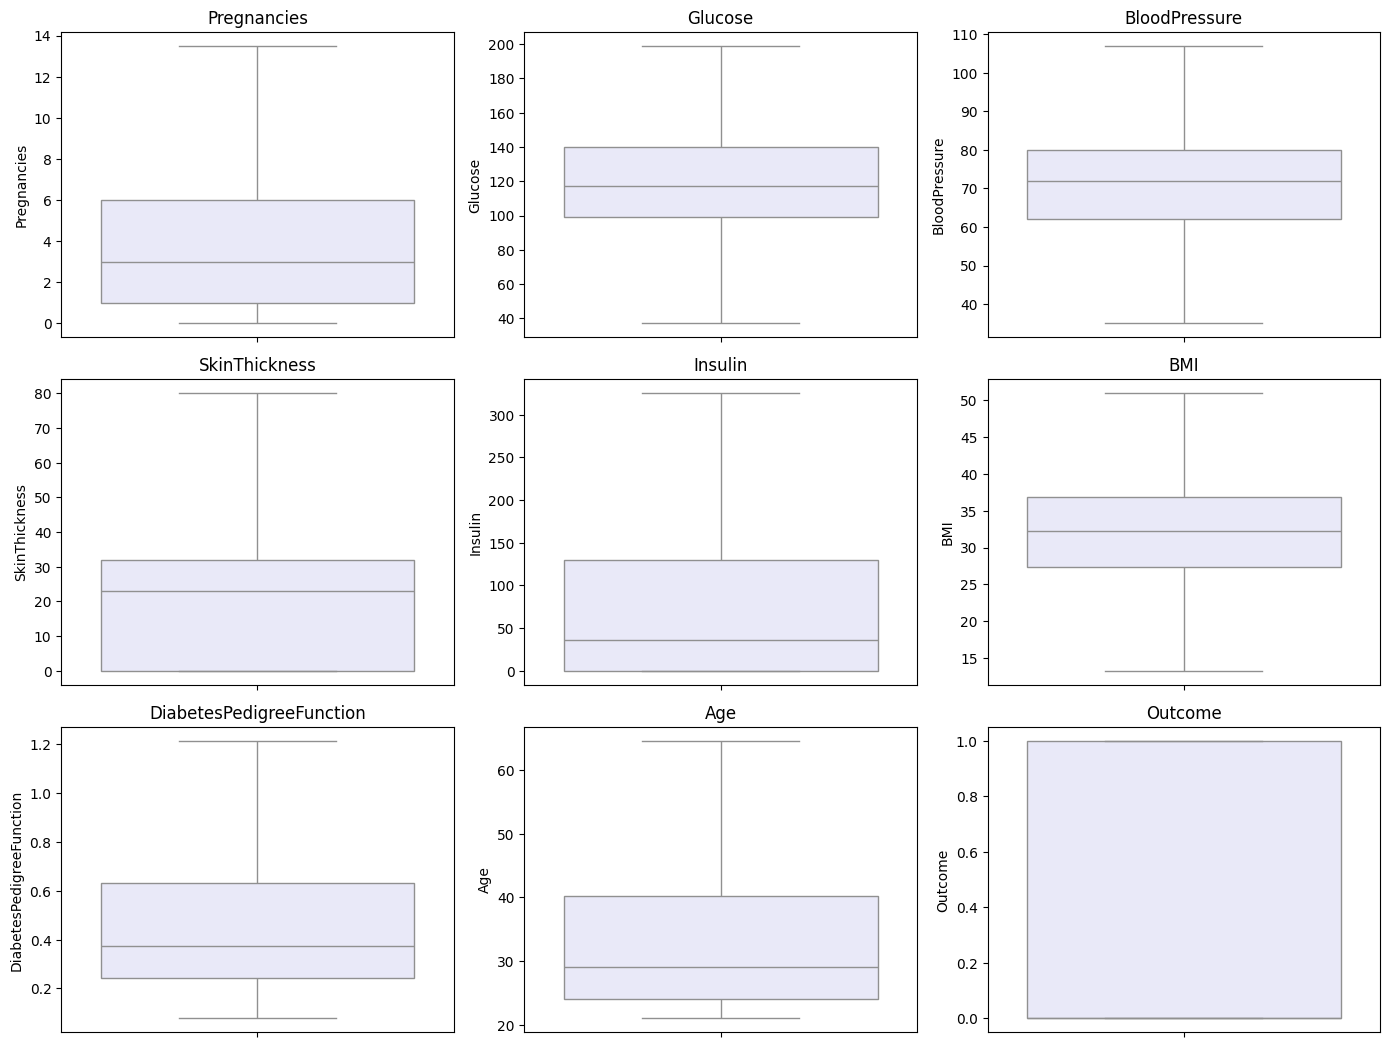

In [406]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_clean[col], color='lavender')
    plt.title(col)
plt.tight_layout()
plt.show()

In [407]:
df_clean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Target distribution:
 Outcome
0    0.659946
1    0.340054
Name: proportion, dtype: float64


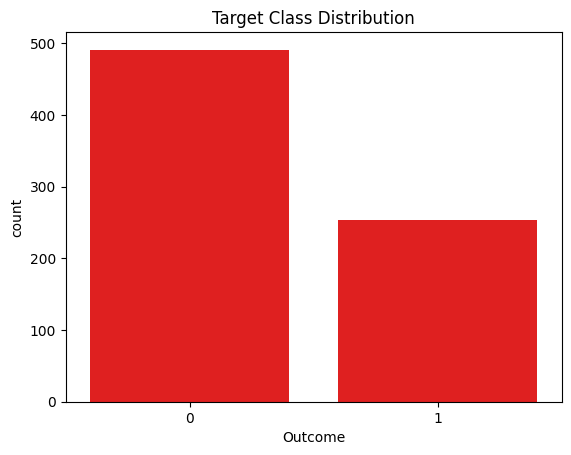

In [408]:
# Visualizing the target distribution
print("Target distribution:\n", df_clean['Outcome'].value_counts(normalize=True))
sns.countplot(x='Outcome', data=df_clean, color='red')
plt.title("Target Class Distribution")
plt.show()

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score  

In [410]:
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [412]:
result={}

def build_model(modelname, model, X_tr, y_tr, X_te, y_te):
    print(f"Evaluate using {modelname} model")
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    
    cm = confusion_matrix(y_te, y_pred)
    
    result[modelname] = {
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "Report": classification_report(y_te, y_pred),
        "Matrix": cm
    }

    
    print(f"Accuracy for {modelname}: {result[modelname]['Accuracy']:.4f}")
    print(f"Precision for {modelname}: {result[modelname]['Precision']:.4f}")
    print(f"Recall for {modelname}: {result[modelname]['Recall']:.4f}")
    print("Classification Report:\n", result[modelname]['Report']) 

    # Plotting the Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {modelname}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() 

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_te)[:, 1]  
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_te)   
    else:
        print(f"⚠️ ROC curve not available for {modelname} (no predict_proba or decision_function)")
        return

    # Compute ROC values
    fpr, tpr, _ = roc_curve(y_te, y_score)
    auc_score = roc_auc_score(y_te, y_score)

    result[modelname]["AUC"] = auc_score

    # Plot ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{modelname} (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {modelname}")
    plt.legend()
    plt.show()


Evaluate using Logistic Regression model
Accuracy for Logistic Regression: 0.7651
Precision for Logistic Regression: 0.7222
Recall for Logistic Regression: 0.5098
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83        98
           1       0.72      0.51      0.60        51

    accuracy                           0.77       149
   macro avg       0.75      0.70      0.72       149
weighted avg       0.76      0.77      0.75       149



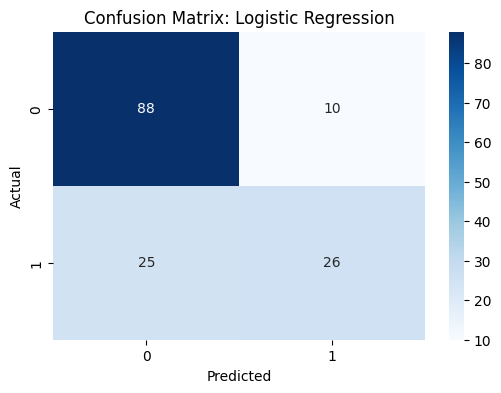

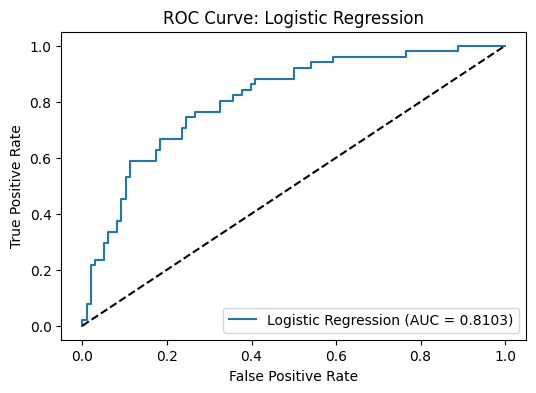

In [413]:
lr_model = LogisticRegression()
build_model("Logistic Regression", lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

Evaluate using Random Forest Classifier model
Accuracy for Random Forest Classifier: 0.7517
Precision for Random Forest Classifier: 0.6667
Recall for Random Forest Classifier: 0.5490
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        98
           1       0.67      0.55      0.60        51

    accuracy                           0.75       149
   macro avg       0.73      0.70      0.71       149
weighted avg       0.74      0.75      0.75       149



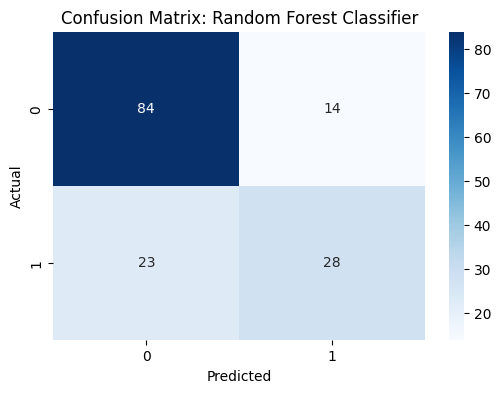

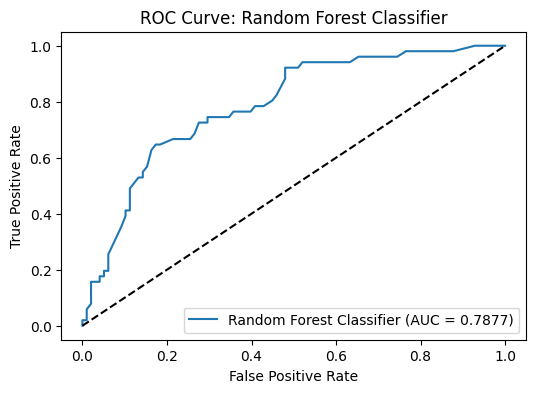

In [414]:
rfc = RandomForestClassifier()
build_model("Random Forest Classifier", rfc, X_train_scaled, y_train, X_test_scaled, y_test)

Evaluate using Decision Tree Classifier model
Accuracy for Decision Tree Classifier: 0.6644
Precision for Decision Tree Classifier: 0.5094
Recall for Decision Tree Classifier: 0.5294
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        98
           1       0.51      0.53      0.52        51

    accuracy                           0.66       149
   macro avg       0.63      0.63      0.63       149
weighted avg       0.67      0.66      0.67       149



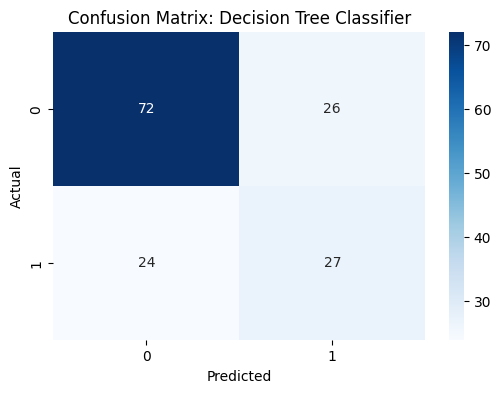

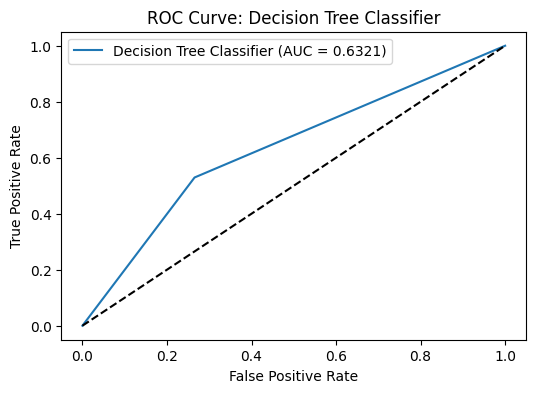

In [415]:
dtc = DecisionTreeClassifier()
build_model("Decision Tree Classifier", dtc, X_train_scaled, y_train, X_test_scaled, y_test)

Evaluate using Support Vector Classifier model
Accuracy for Support Vector Classifier: 0.7987
Precision for Support Vector Classifier: 0.7838
Recall for Support Vector Classifier: 0.5686
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        98
           1       0.78      0.57      0.66        51

    accuracy                           0.80       149
   macro avg       0.79      0.74      0.76       149
weighted avg       0.80      0.80      0.79       149



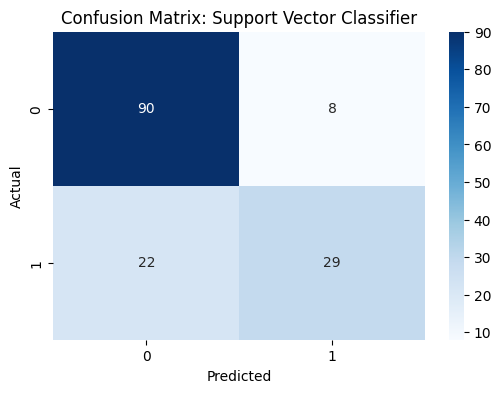

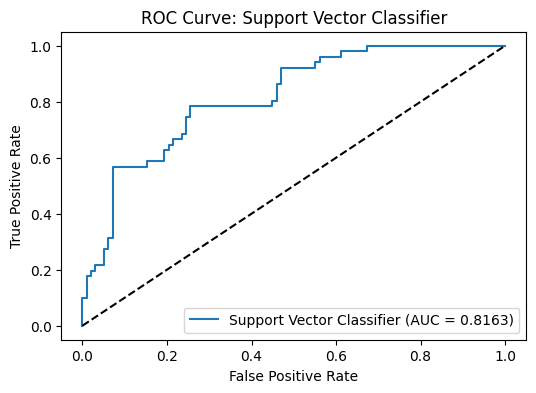

In [416]:
svc = SVC()
build_model("Support Vector Classifier", svc, X_train_scaled, y_train, X_test_scaled, y_test)

Evaluate using K-Nearest Neighbors Classifier model
Accuracy for K-Nearest Neighbors Classifier: 0.7315
Precision for K-Nearest Neighbors Classifier: 0.6341
Recall for K-Nearest Neighbors Classifier: 0.5098
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        98
           1       0.63      0.51      0.57        51

    accuracy                           0.73       149
   macro avg       0.70      0.68      0.69       149
weighted avg       0.72      0.73      0.72       149



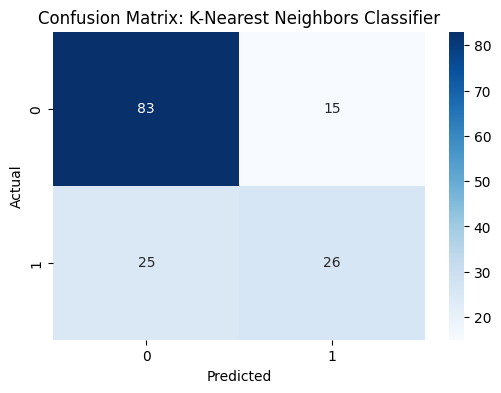

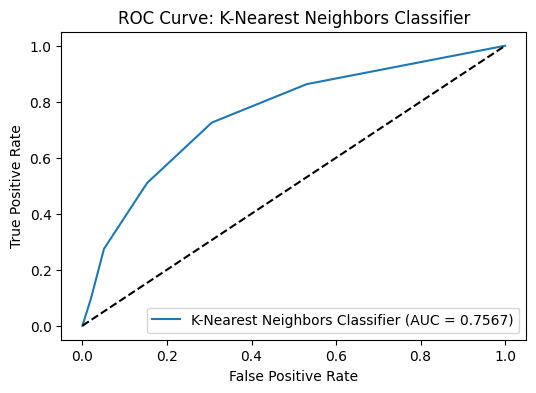

In [417]:
knn = KNeighborsClassifier()
build_model("K-Nearest Neighbors Classifier", knn, X_train_scaled, y_train, X_test_scaled, y_test)

In [418]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.7540087066932705


In [419]:
import joblib
joblib.dump(rfc, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [421]:
#Summary

# From your notebook results, SVM (Support Vector Machine) gives the best performance because it has the highest Accuracy (0.7987), Precision (0.7838), 
# and Recall (0.5686) compared to the other models.